In [1]:
pip install plotly

In [14]:
import plotly.express as px

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

**Data Preparation**

In [50]:
walmart = pd.read_csv('train.csv')
stores = pd.read_csv('stores.csv')
features = pd.read_csv('features.csv')
testing = pd.read_csv('test.csv')


**Merging of Data**

In [51]:
merged = walmart.merge(stores, how='left').merge(features, how='left')
testing_merged = testing.merge(stores, how='left').merge(features, how='left')
testing_merged


,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573
2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573
3,1,1,2012-11-23,True,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573
4,1,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,False,B,118221,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN
115060,45,98,2013-07-05,False,B,118221,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN
115061,45,98,2013-07-12,False,B,118221,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN
115062,45,98,2013-07-19,False,B,118221,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN


**Extracting Date Information**

In [52]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = (df.Date.dt.isocalendar().week)*1.0

split_date(merged)
split_date(testing_merged)

**Columns Information: Data Types**

In [53]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     150681 non-null  float64       
 10  MarkDown2     111248 non-null  float64       
 11  MarkDown3     137091 non-null  float64       
 12  MarkDown4     134967 non-null  float64       
 13  MarkDown5     151432 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

**Missing Values**

In [54]:
missing_values = merged.isna().sum()
px.bar(missing_values,
       x=missing_values.index,
       y=missing_values.values,
       title="Missing Values",
       labels=dict(x="Variable", y="Missing Values"))

**Popularity of Store Types**

In [55]:
typecounts = merged.Type.value_counts().to_dict()
df = pd.DataFrame(list(typecounts.items()), columns=['Store_Type', 'Counts'])

fig = px.pie(df, values='Counts', names='Store_Type',
             title='Popularity of Store Types',labels='Store_Type')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

**Average Sales - Store Type**

In [56]:
avgweeklysales = merged.groupby('Type')['Weekly_Sales'].mean().to_dict()
df = pd.DataFrame(list(avgweeklysales.items()), columns=['Store_Type', 'AvgSales'])

fig = px.bar(df,
             x="Store_Type",
             y="AvgSales",
             title="Avergae Sales - Per Store",
             color_discrete_sequence=["Blue"])
fig.show()

**Average Monthly Sales - Per Year**

In [57]:
sales2010 = merged[(merged.Year == 2010)].groupby('Month')['Weekly_Sales'].mean().to_dict()
df2010 = pd.DataFrame(list(sales2010.items()), columns=['Month', 'AvgSales2010'])

sales2011 = merged[merged.Year == 2011].groupby('Month')['Weekly_Sales'].mean().to_dict()
df2011 = pd.DataFrame(list(sales2011.items()), columns=['Month', 'AvgSales2011'])

sales2012 = merged[merged.Year == 2012].groupby('Month')['Weekly_Sales'].mean().to_dict()
df2012 = pd.DataFrame(list(sales2012.items()), columns=['Month', 'AvgSales2012'])

monthly_merged = df2010.merge(df2011, how='right', on='Month').merge(df2012, how='left', on='Month')

import plotly.graph_objs as go
# create trace1
trace1 = go.Bar(
                x = df2010.Month,
                y = df2010.AvgSales2010,
                name = "AvgSales2010",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line=dict(color='green',width=1.5)))
# create trace2
trace2 = go.Bar(
                x = df2011.Month,
                y = df2011.AvgSales2011,
                name = "AvgSales2011",
                marker = dict(color = 'rgba(255, 255, 128, 0.5)',
                              line=dict(color='red',width=1.5)))

# create trace3
trace3 = go.Bar(
                x = df2012.Month,
                y = df2012.AvgSales2012,
                name = "AvgSales2012",
                marker = dict(color = 'Blue',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
data = [trace1, trace2, trace3]
layout = go.Layout(barmode = "group",
                   xaxis_title="Month",
                   yaxis_title="Average Monthly Sales")
fig = go.Figure(data = data, layout = layout)
fig.update_xaxes( dtick=1)
fig.show()

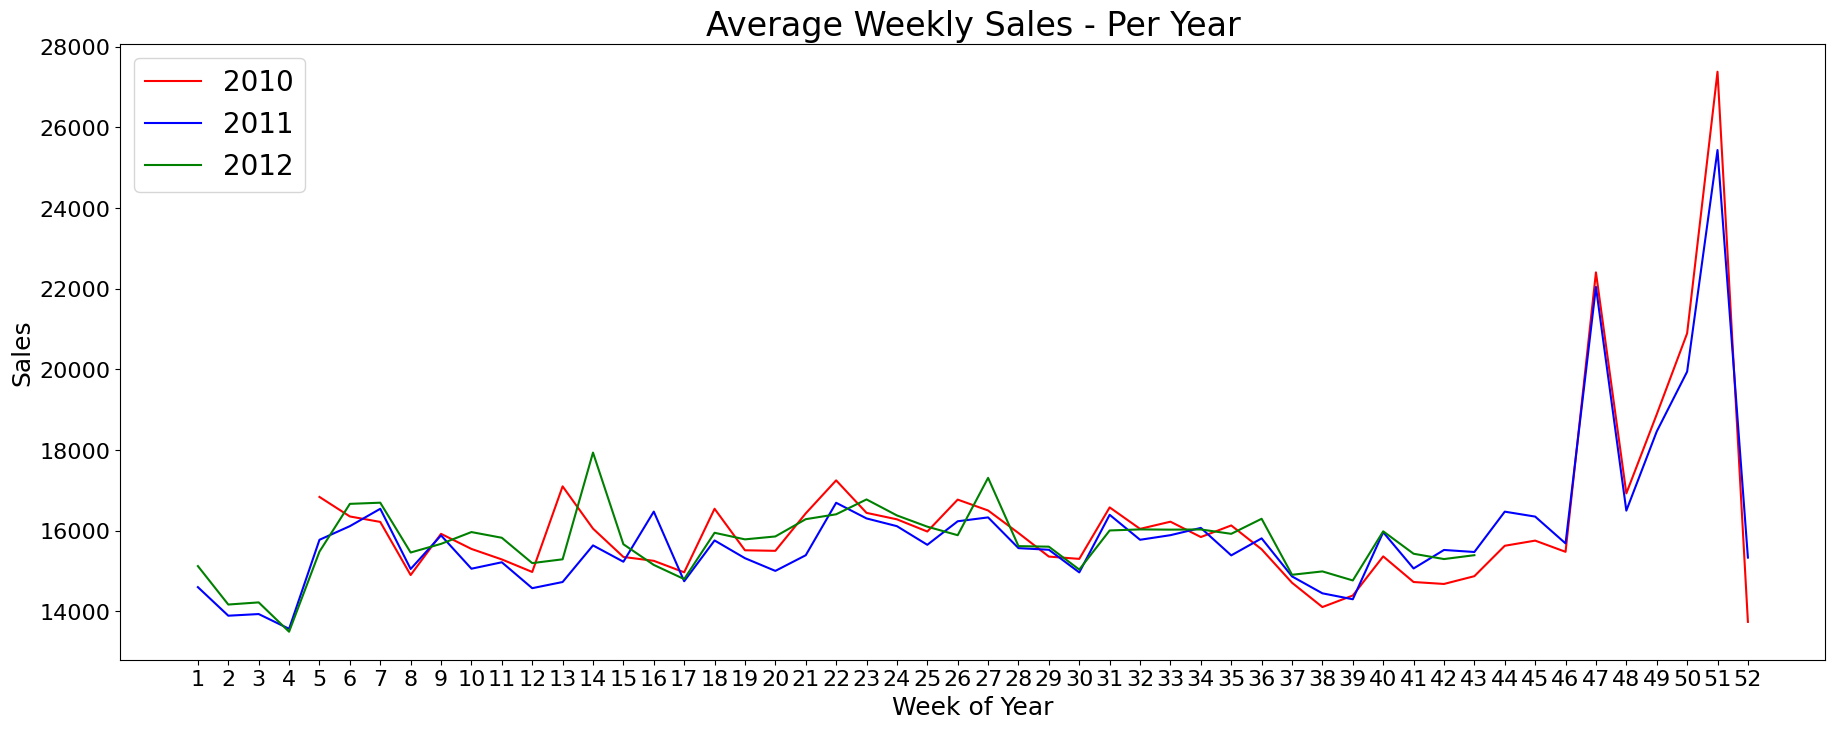

In [58]:
weekly_sales_2010 = merged[merged.Year==2010].groupby('WeekOfYear')['Weekly_Sales'].mean()
weekly_sales_2011 = merged[merged.Year==2011].groupby('WeekOfYear')['Weekly_Sales'].mean()
weekly_sales_2012 = merged[merged.Year==2012].groupby('WeekOfYear')['Weekly_Sales'].mean()

plt.figure(figsize=(22,8))
plt.plot(weekly_sales_2010.index, weekly_sales_2010.values, 'red')
plt.plot(weekly_sales_2011.index, weekly_sales_2011.values, 'blue')
plt.plot(weekly_sales_2012.index, weekly_sales_2012.values, 'green')

plt.xticks(np.arange(1, 53, step=1), fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Week of Year', fontsize=18)
plt.ylabel('Sales', fontsize=18)

plt.title("Average Weekly Sales - Per Year", fontsize=24)
plt.legend(['2010', '2011', '2012'], fontsize=20);

**Average Department Sales**

In [61]:
dept_sales = merged.groupby('Dept')['Weekly_Sales'].mean().sort_values(ascending=False)


fig = px.bar(dept_sales,
             x=dept_sales.index,
             y=dept_sales.values,
             title="Average Sales - Per Department",
             labels={'x':'Dept', 'y':'Sales'},
             color_discrete_sequence=["#DC143C"])

fig.update_xaxes(tick0=1, dtick=1)

fig.show()

**Relationship: Week of Year vs Sales**

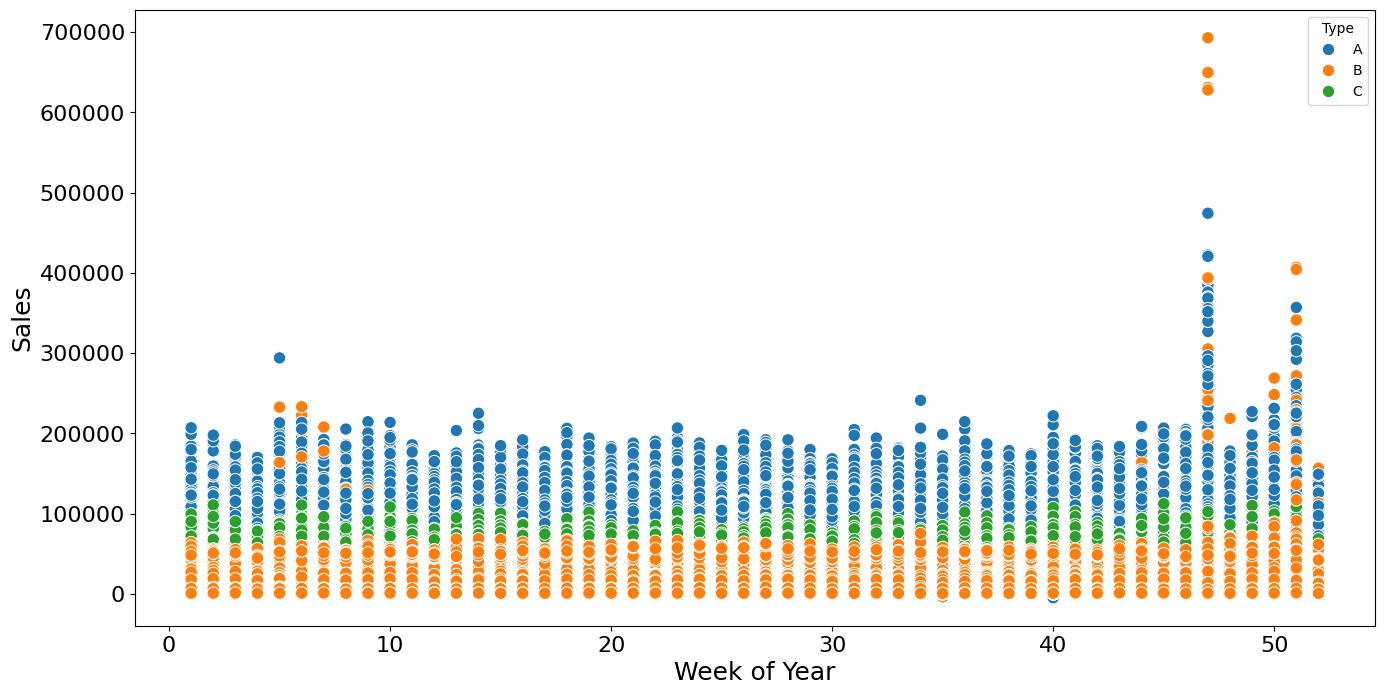

In [60]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=merged.WeekOfYear, y=merged.Weekly_Sales, hue=merged.Type, s=80);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Week of Year', fontsize=18)
plt.ylabel('Sales', fontsize=18);

**Average Store Sales - Year Wise**

In [62]:

from plotly.subplots import make_subplots
store_sales_2010 = merged[merged.Year==2010].groupby('Store')['Weekly_Sales'].mean().to_dict()
store2010_df = pd.DataFrame(list(store_sales_2010.items()), columns=['Store', 'AvgSales2010'])

store_sales_2011 = merged[merged.Year==2011].groupby('Store')['Weekly_Sales'].mean().to_dict()
store2011_df = pd.DataFrame(list(store_sales_2011.items()), columns=['Store', 'AvgSales2011'])

store_sales_2012 = merged[merged.Year==2012].groupby('Store')['Weekly_Sales'].mean().to_dict()
store2012_df = pd.DataFrame(list(store_sales_2012.items()), columns=['Store', 'AvgSales2012'])

fig = make_subplots(rows=3, cols=1, subplot_titles=("Average Store Sales 2010", "Average Store Sales 2011", "Average Store Sales 2012"))

fig.add_trace(go.Bar(x=store2010_df.Store, y=store2010_df.AvgSales2010,),1, 1)

fig.add_trace(go.Bar(x=store2011_df.Store, y=store2011_df.AvgSales2011,),2, 1)

fig.add_trace(go.Bar(x=store2012_df.Store, y=store2012_df.AvgSales2012,),3, 1)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False, height=1500)

fig.update_xaxes(title_text="Store", row=1, col=1)
fig.update_xaxes(title_text="Store", row=2, col=1)
fig.update_xaxes(title_text="Store", row=3, col=1)

fig.update_yaxes(title_text="AvgSales", row=1, col=1)
fig.update_yaxes(title_text="AvgSales", row=2, col=1)
fig.update_yaxes(title_text="AvgSales", row=3, col=1)

fig.update_xaxes(tick0=1, dtick=1)
fig.show()

**Holidays Vs Nonholidays Sales**

In [63]:
from plotly.subplots import make_subplots


holiday_sales = merged.groupby('IsHoliday')['Weekly_Sales'].mean()
holiday_counts = merged.IsHoliday.value_counts()

fig = make_subplots(rows=1, cols=2, subplot_titles=("Holidays/Nonholidays Sales", "Holidays/Nonholidays Counts"))

fig.add_trace(go.Bar(x=holiday_sales.index, y=holiday_sales.values,),1, 1)

fig.add_trace(go.Bar(x=holiday_counts.index, y=holiday_counts.values,),1, 2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False)
fig.show()

**Relationship: Size of Store vs Sales**

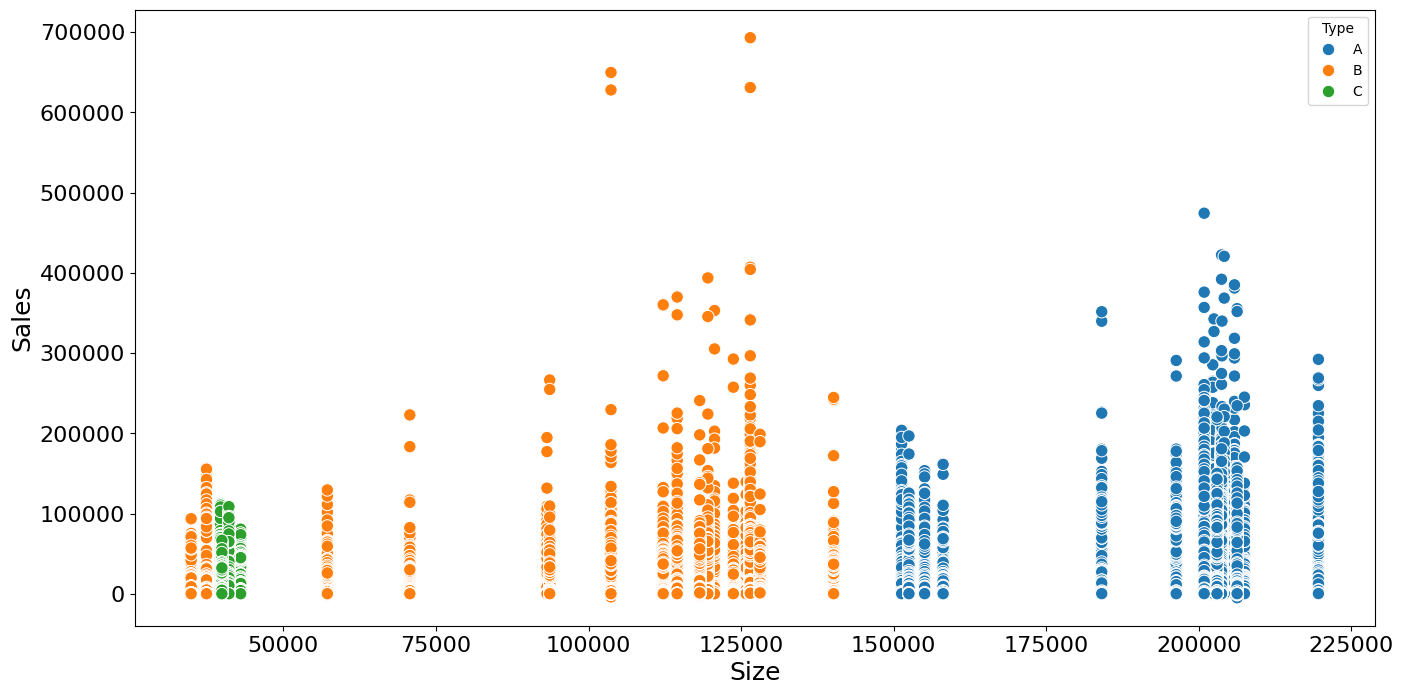

In [64]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=merged.Size, y=merged.Weekly_Sales, hue=merged.Type, s=80);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Size', fontsize=18)
plt.ylabel('Sales', fontsize=18);

**Relationship: Fuel Price vs Sales**

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 9 (	) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 9 (	) missing from current font.



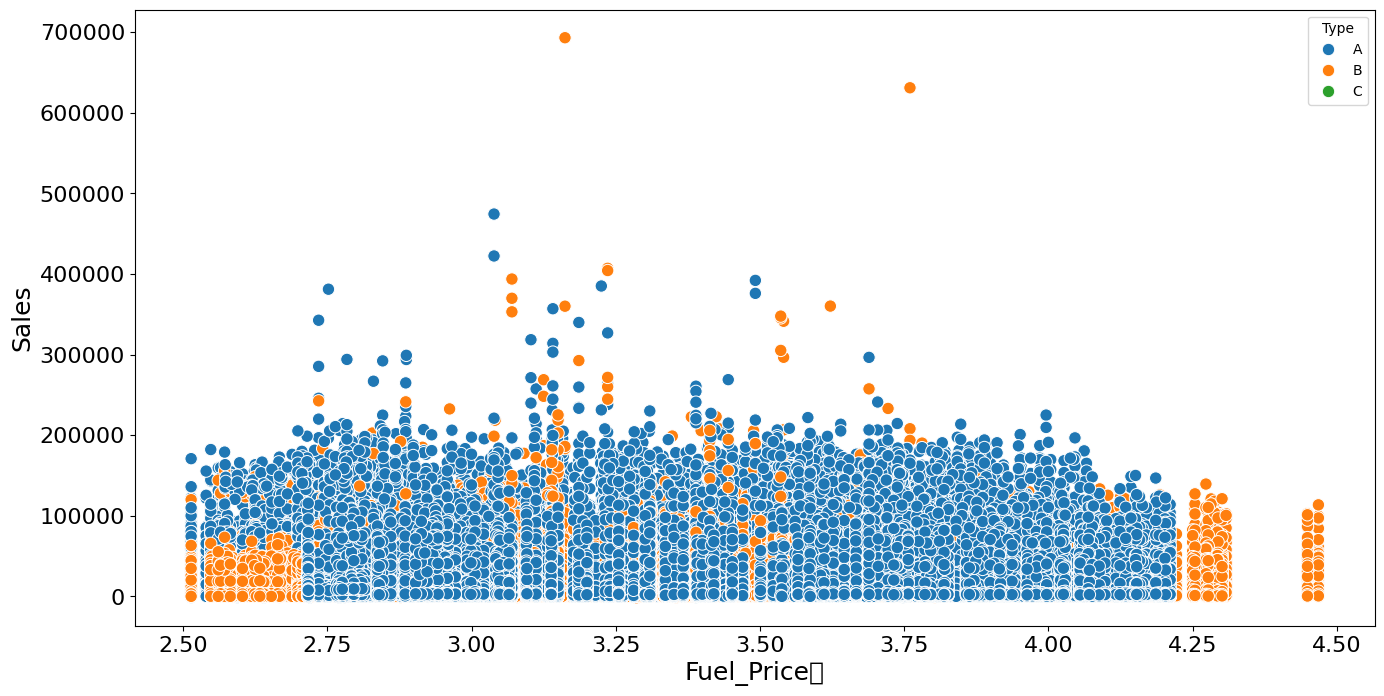

In [30]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=merged.Fuel_Price, y=merged.Weekly_Sales, hue=merged.Type, s=80);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Fuel_Price	', fontsize=18)
plt.ylabel('Sales', fontsize=18);

**Relationship: Unemployment vs Sales**

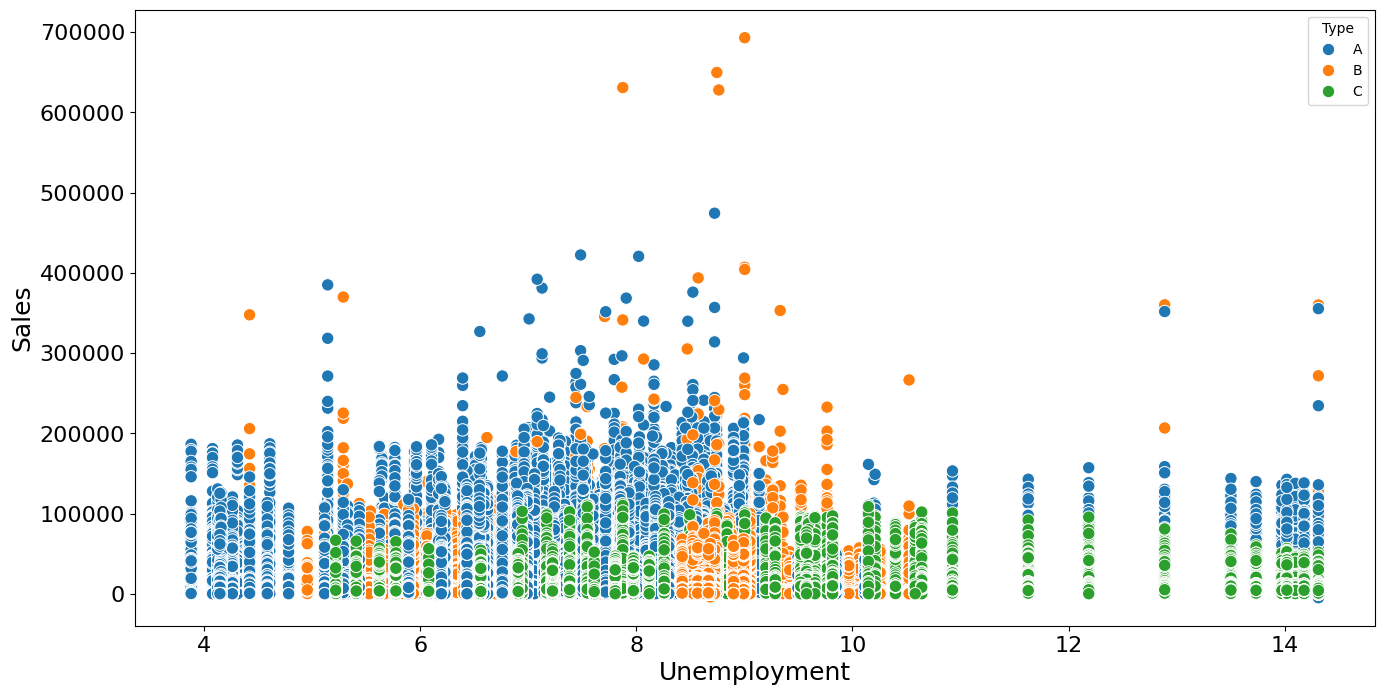

In [65]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=merged.Unemployment, y=merged.Weekly_Sales, hue=merged.Type, s=80);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Unemployment', fontsize=18)
plt.ylabel('Sales', fontsize=18);

**Correlation Matrix**

In [68]:
storetype_values = {'A':3, 'B':2, 'C':1}
merged['Type_Numeric'] = merged.Type.map(storetype_values)
testing_merged['Type_Numeric'] = testing_merged.Type.map(storetype_values)

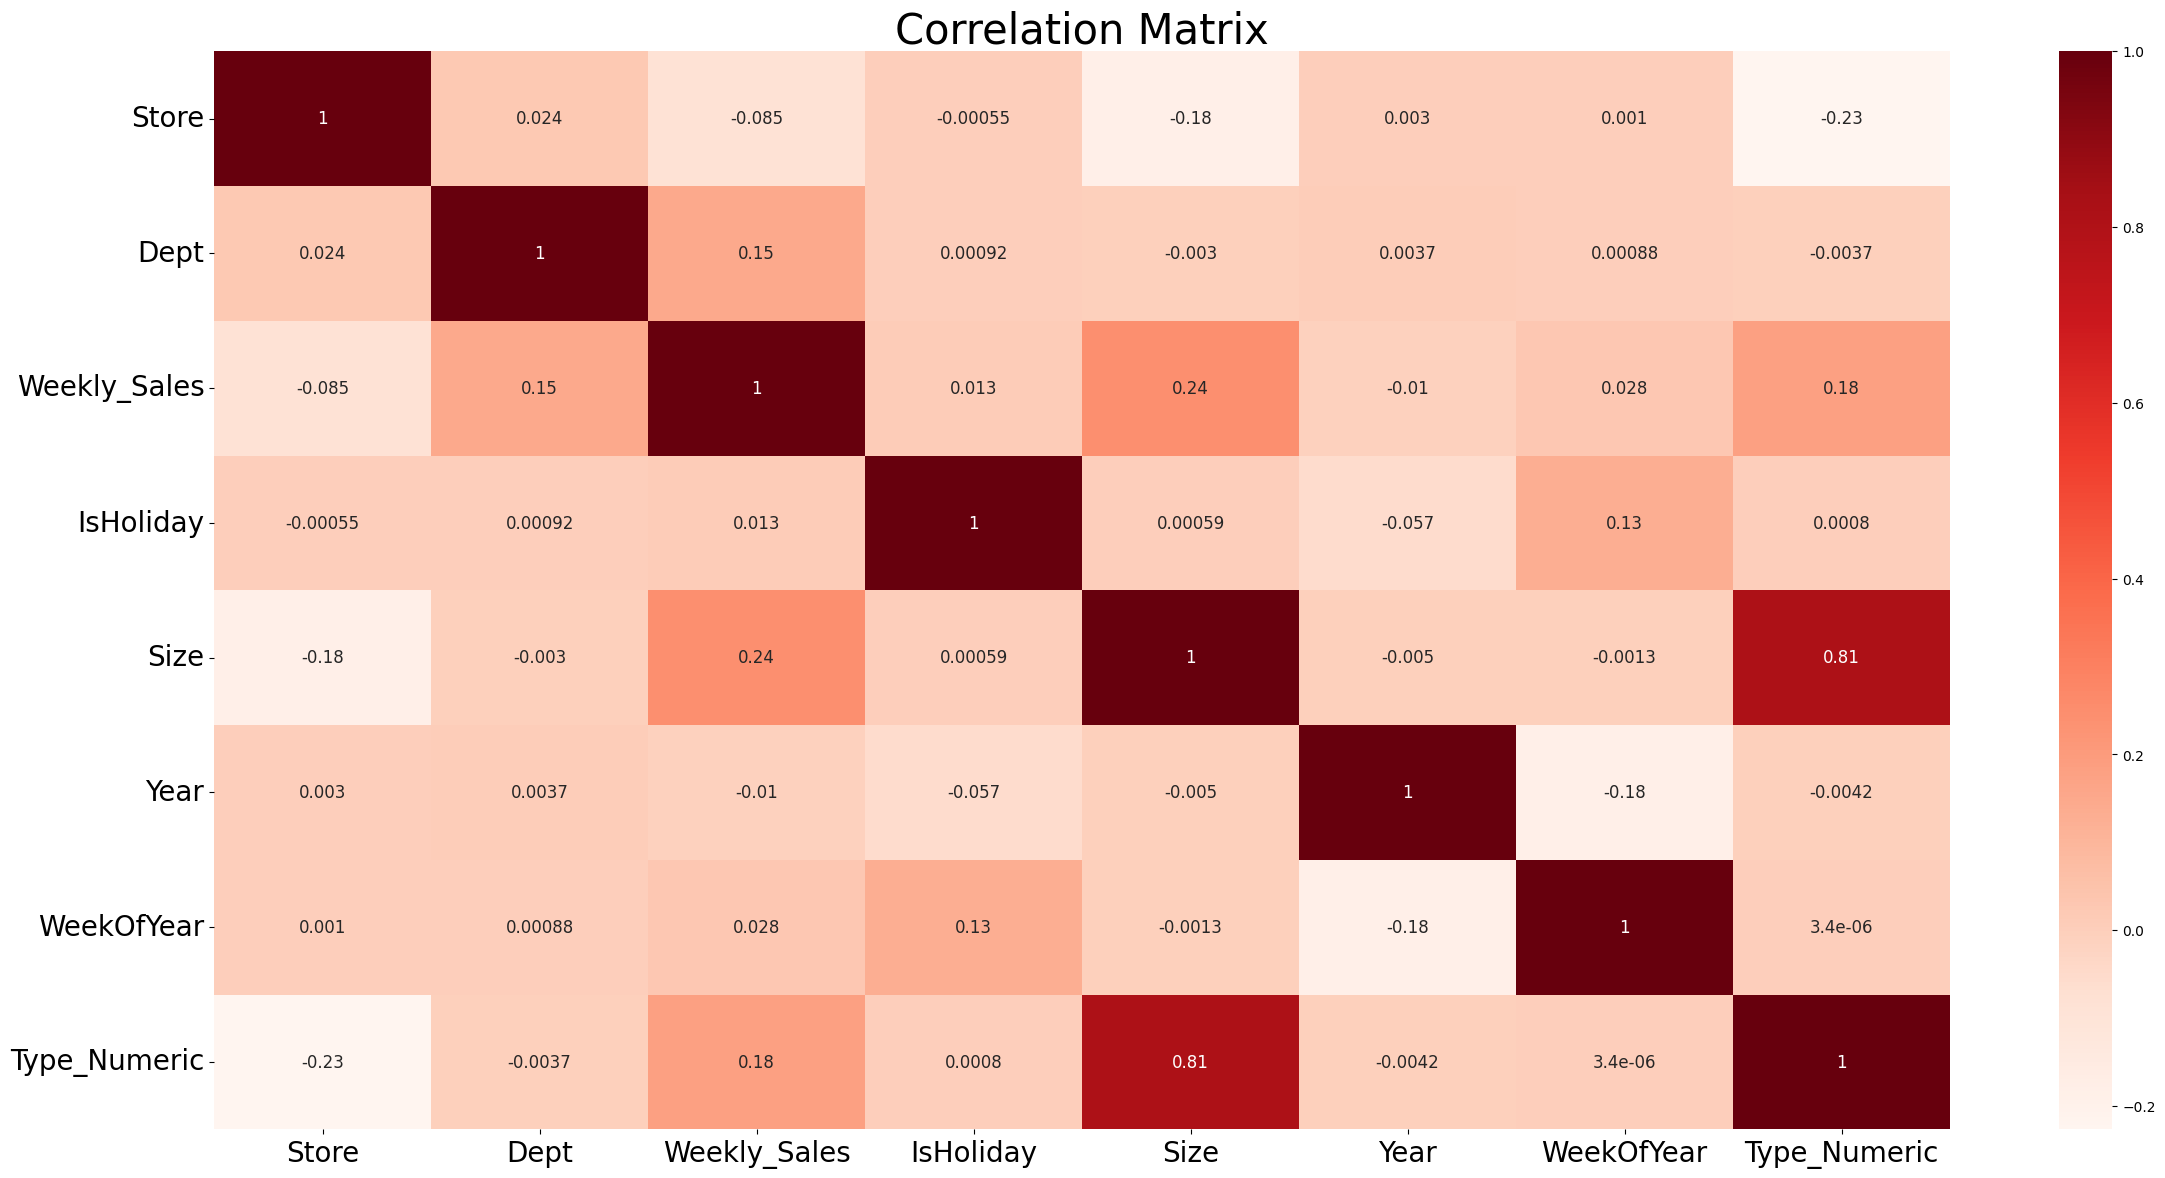

In [77]:
plt.figure(figsize=(28,14))
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)
sns.heatmap(merged.corr(), cmap='Reds', annot=True, annot_kws={'size':12})

plt.title('Correlation Matrix', fontsize=30);

In [72]:
merged = merged.drop(['Date', 'Temperature','Fuel_Price', 'Type', 'MarkDown1', 'MarkDown2', 'MarkDown3',
             'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Month', 'Day' ], axis=1)

testing_merged = testing_merged.drop(['Date', 'Temperature','Fuel_Price', 'Type', 'MarkDown1', 'MarkDown2', 'MarkDown3',
             'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Month', 'Day' ], axis=1)

In [73]:
# Identify input and target columns

input_cols = merged.columns.to_list()
input_cols.remove('Weekly_Sales')
target_col = 'Weekly_Sales'

X = merged[input_cols].copy()
y = merged[target_col].copy()

In [74]:
# Scale the values

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(merged[input_cols])

X[input_cols] = scaler.transform(X[input_cols])
testing_merged[input_cols] = scaler.transform(testing_merged[input_cols])

In [75]:
# Create training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [76]:
from sklearn.linear_model import LinearRegression

# Create and train the model
model = LinearRegression()
model.fit(X,y)

# Generate predictions on training data
train_preds = model.predict(X_train)
train_preds


array([17035.12035741, 15737.5350701 , 22990.63793901, ...,
       20276.77727003, 21110.53004444, 23548.55581834])